### Import libraries

In [3]:
import pandas as pd
import getpass
import sqlalchemy as sa
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
from mpl_toolkits.mplot3d import Axes3D


In [4]:
it_salary=pd.read_csv('C:\\Users\\User\\Downloads\\IT_Salary_Survey_EU_2020_csv.csv')###loading data
it_salary.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology,Yearly brutto salary in EUR,Main language at work,Company size,Company type
0,66,Male,Munich,Software Engineer,40,Lead,Ruby,240000.0,German,51-100,Product
1,54,Male,Milano,Sales,31,Head,Network Automation,216000.0,English,Nov-50,Consulting
2,59,Male,Berlin,Backend Developer,30,Senior,Java,210000.0,German,101-1000,Product
3,45,Male,Berlin,Backend Developer,30,Senior,PHP,210000.0,English,Nov-50,Startup
4,51,Male,Berlin,Software Engineer,30,Senior,VB,200000.0,German,1000+,Consulting


### Data Cleaning

In [5]:
#Standardizing header names
it_salary.rename(columns={'Your main technology':'Technology','Yearly brutto salary in EUR':'Yearly Salary'}, inplace=True)
it_salary.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Technology,Yearly Salary,Main language at work,Company size,Company type
0,66,Male,Munich,Software Engineer,40,Lead,Ruby,240000.0,German,51-100,Product
1,54,Male,Milano,Sales,31,Head,Network Automation,216000.0,English,Nov-50,Consulting
2,59,Male,Berlin,Backend Developer,30,Senior,Java,210000.0,German,101-1000,Product
3,45,Male,Berlin,Backend Developer,30,Senior,PHP,210000.0,English,Nov-50,Startup
4,51,Male,Berlin,Software Engineer,30,Senior,VB,200000.0,German,1000+,Consulting


In [6]:
#Replacing 'Nov' with '0'
def convert(x):
    if type(x) == str:
        return x.replace('Nov','0')
    else:
        return x
it_salary['Company size']=it_salary['Company size'].apply(convert)

In [7]:
##Checking basic info of data set
it_salary.describe()

,Age,Total years of experience,Yearly Salary
count,1990.000000,1990.000000,1990.000000
mean,32.274372,8.626131,72250.362377
std,5.279812,5.210204,23220.417838
min,20.000000,0.000000,20000.000000
25%,29.000000,5.000000,60000.000000
50%,32.000000,8.000000,70000.000000
75%,35.000000,12.000000,80000.000000
max,66.000000,40.000000,240000.000000


In [8]:
it_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1990 non-null   int64  
 1   Gender                     1990 non-null   object 
 2   City                       1990 non-null   object 
 3   Position                   1990 non-null   object 
 4   Total years of experience  1990 non-null   int64  
 5   Seniority level            1990 non-null   object 
 6   Technology                 1985 non-null   object 
 7   Yearly Salary              1990 non-null   float64
 8   Main language at work      1990 non-null   object 
 9   Company size               1990 non-null   object 
 10  Company type               1990 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 171.1+ KB


In [9]:
it_salary.isnull().sum()

Age                          0
Gender                       0
City                         0
Position                     0
Total years of experience    0
Seniority level              0
Technology                   5
Yearly Salary                0
Main language at work        0
Company size                 0
Company type                 0
dtype: int64

In [10]:
###Replacing null data
it_salary["Main technology"].fillna("None", inplace = True)

KeyError: 'Main technology'

In [ ]:
it_salary.isnull().sum()

### Data Visualization

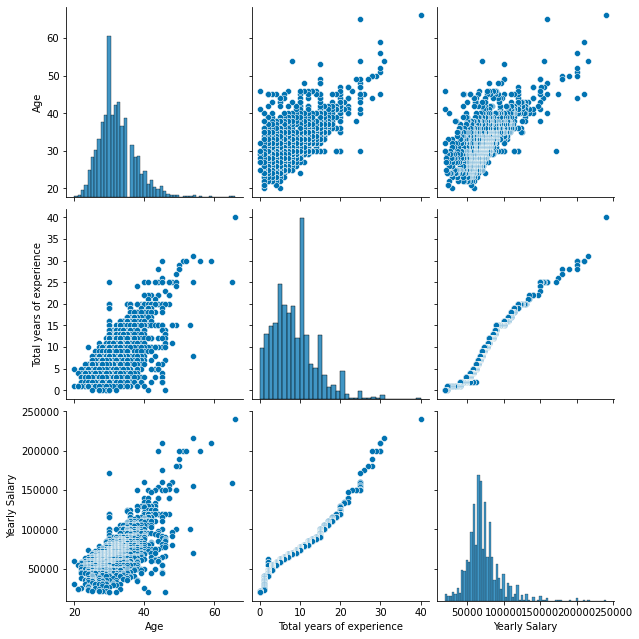

In [13]:
##Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=it_salary, height=3)

In [14]:
###create box plots
fig,ax=plt.subplots(ncols=10,nrows=5,figsize=(20,10))
index=0
ax=ax.flatten()
for col,value=df.items():
    sns.boxplot(y=col,data=df)
    index+=1

SyntaxError: invalid syntax (Temp/ipykernel_56140/1779613343.py, line 5)

In [15]:
###Selecting features to be used and storing in a dataframe
it_salary_df=it_salary[['Age','Total years of experience', 'Yearly Salary','Gender','Company size']]
df=pd.DataFrame(it_salary_df)
df

,Age,Total years of experience,Yearly Salary,Gender,Company size
0,66,40,240000.0,Male,51-100
1,54,31,216000.0,Male,0-50
2,59,30,210000.0,Male,101-1000
3,45,30,210000.0,Male,0-50
4,51,30,200000.0,Male,1000+
...,...,...,...,...,...
1985,46,0,20000.0,Male,51-100
1986,30,0,20000.0,Female,51-100
1987,41,0,20000.0,Male,1000+
1988,30,0,20000.0,Female,0-50


In [16]:
###Data Transformation
pd.get_dummies(df, columns=['Gender','Company size'])
df=pd.get_dummies(df, columns=['Gender', 'Company size'])
df

,Age,Total years of experience,Yearly Salary,Gender_Diverse,Gender_Female,Gender_Male,Company size_0-50,Company size_1000+,Company size_101-1000,Company size_51-100,Company size_up to 10
0,66,40,240000.0,0,0,1,0,0,0,1,0
1,54,31,216000.0,0,0,1,1,0,0,0,0
2,59,30,210000.0,0,0,1,0,0,1,0,0
3,45,30,210000.0,0,0,1,1,0,0,0,0
4,51,30,200000.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1985,46,0,20000.0,0,0,1,0,0,0,1,0
1986,30,0,20000.0,0,1,0,0,0,0,1,0
1987,41,0,20000.0,0,0,1,0,1,0,0,0
1988,30,0,20000.0,0,1,0,1,0,0,0,0


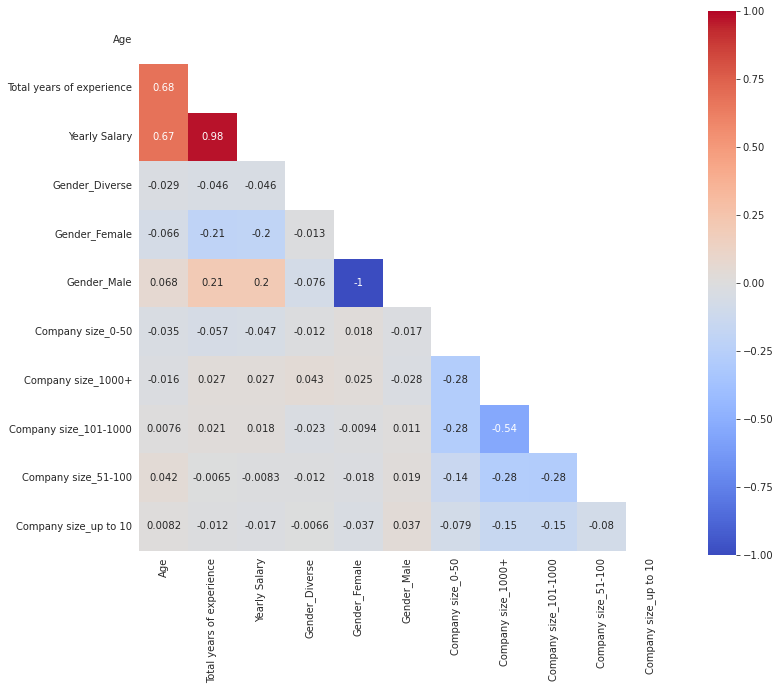

In [17]:
###Checking correlation
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Linear Regression

In [18]:
##Defining X and y
X=df[["Total years of experience"]]
y=df[["Yearly Salary"]]
###Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lr = LinearRegression().fit(X_train, y_train) ##fitting the model

In [19]:
##Getting results
R_sq = lr.score(X_train, y_train)  
print('coefficient of determination:', R_sq)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination: 0.9521997943585124
intercept: [34149.70001806]
slope: [[4425.23038769]]


In [20]:
##Predicting target variable
y_pred = lr.predict(X_test) 

##print('predicted response:', y_pred, sep='\n')

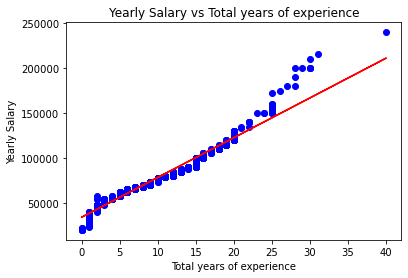

In [21]:
##Plotting the graph showing the regression line
plt.scatter(X_train , y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Yearly Salary vs Total years of experience')
plt.xlabel("Total years of experience")
plt.ylabel("Yearly Salary")
plt.show()

### Multiple Regression

In [23]:
##Defining X and y
X=df[["Age","Total years of experience"]]
y=df[["Yearly Salary"]]
X.values.reshape(-1,2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
mlr = LinearRegression().fit(X_train, y_train) ##fitting the model

In [24]:
##Getting results
R_sq = mlr.score(X_train, y_train)  
print('coefficient of determination:', R_sq)
print('intercept:', mlr.intercept_)
print('slope:', mlr.coef_)

coefficient of determination: 0.9523970871616747
intercept: [31864.87387594]
slope: [[  86.77845319 4364.71296493]]


In [25]:
print(mlr.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9501014765341799
Mean Absolute Error: 3536.1394374916827
Mean Squared Error: 21611191.8414422
Root Mean Squared Error: 4648.783909953462


In [26]:
###Visualizing Multi-Regression model

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = y

xx_pred = np.linspace(4, 9, 30)  # range of age values
yy_pred = np.linspace(2, 5, 30)  # range of experience values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
mlr_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predicting by using model built in previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = mlr.predict(mlr_viz)

# Evaluate model by using it's R2 score 
r2 = mlr.score(X, y)

# Plot model visualization
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Total years of experience', fontsize=12)
    ax.set_zlabel('Yearly Salary', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = 0.95$)' % r2, fontsize=15, color='k')

fig.tight_layout()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
# Values to predict(Demo)

Age = input('What is the age of the employee \n')
Total_Years_of_experience = input('How many years of experience does the employee have? \n')
try:
    print('We predict {:.0f} as the yearly salary of the employee with age ${} and ${} years of experience.'.format(
        mlr.predict([[float('Age'), float('Total years of experience')]])[0],
        Age,Total_years_of_experience))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

In [ ]:
##Using three independent features
X=df[['Age','Company size_101-1000','Gender_Male']]
y=df["Yearly Salary"]
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)##split data

mlr2 = LinearRegression().fit(X_train, y_train)###fitting the model


In [ ]:
R_sq = mlr2.score(X_train_scaled, y_train)  ##Getting results
print('coefficient of determination:', R_sq)
print('intercept:', mlr2.intercept_)
print('slope:', mlr2.coef_)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Final Model

In [12]:
X = df.drop("Yearly Salary", axis=1)
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df['Yearly Salary'], X).fit()
print(olsmod.summary())

NameError: name 'df' is not defined

In [ ]:
print(olsmod.pvalues)

In [ ]:
X=df.drop('Yearly Salary', axis=1)
y=df['Yearly Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)##split data
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
model=LinearRegression()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[0:5]

In [ ]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:",model.score(X_test, y_test))

### Cross Validation-(k-Fold)

In [11]:
from sklearn.model_selection import KFold
##Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6)
print ("Cross-validated scores:", scores)

NameError: name 'model' is not defined

In [ ]:
# Making cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [ ]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

### Features Importance

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.figure(figsize=(20, 15))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()